<a href="https://colab.research.google.com/github/Natasha-70/PRODIGY_DS-/blob/main/PRODIGY_DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/online_shoppers_intention.csv")

In [4]:
print(df.head())              # Show first few rows
print(df.info())              # Overview: data types, nulls
print(df['Revenue'].value_counts())  # Target class distribution

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [5]:
# Step 4: Store target before encoding
y = df['Revenue'].astype(int)  # Convert True/False to 1/0

In [7]:
# Step 5: Encode the rest of the dataset
X = pd.get_dummies(df.drop('Revenue', axis=1), drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(     X, y, test_size=0.3, random_state=42, stratify=y)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
y_pred = dt_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.895647472289808

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3127
           1       0.72      0.53      0.61       572

    accuracy                           0.90      3699
   macro avg       0.82      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699


Confusion Matrix:
 [[3007  120]
 [ 266  306]]


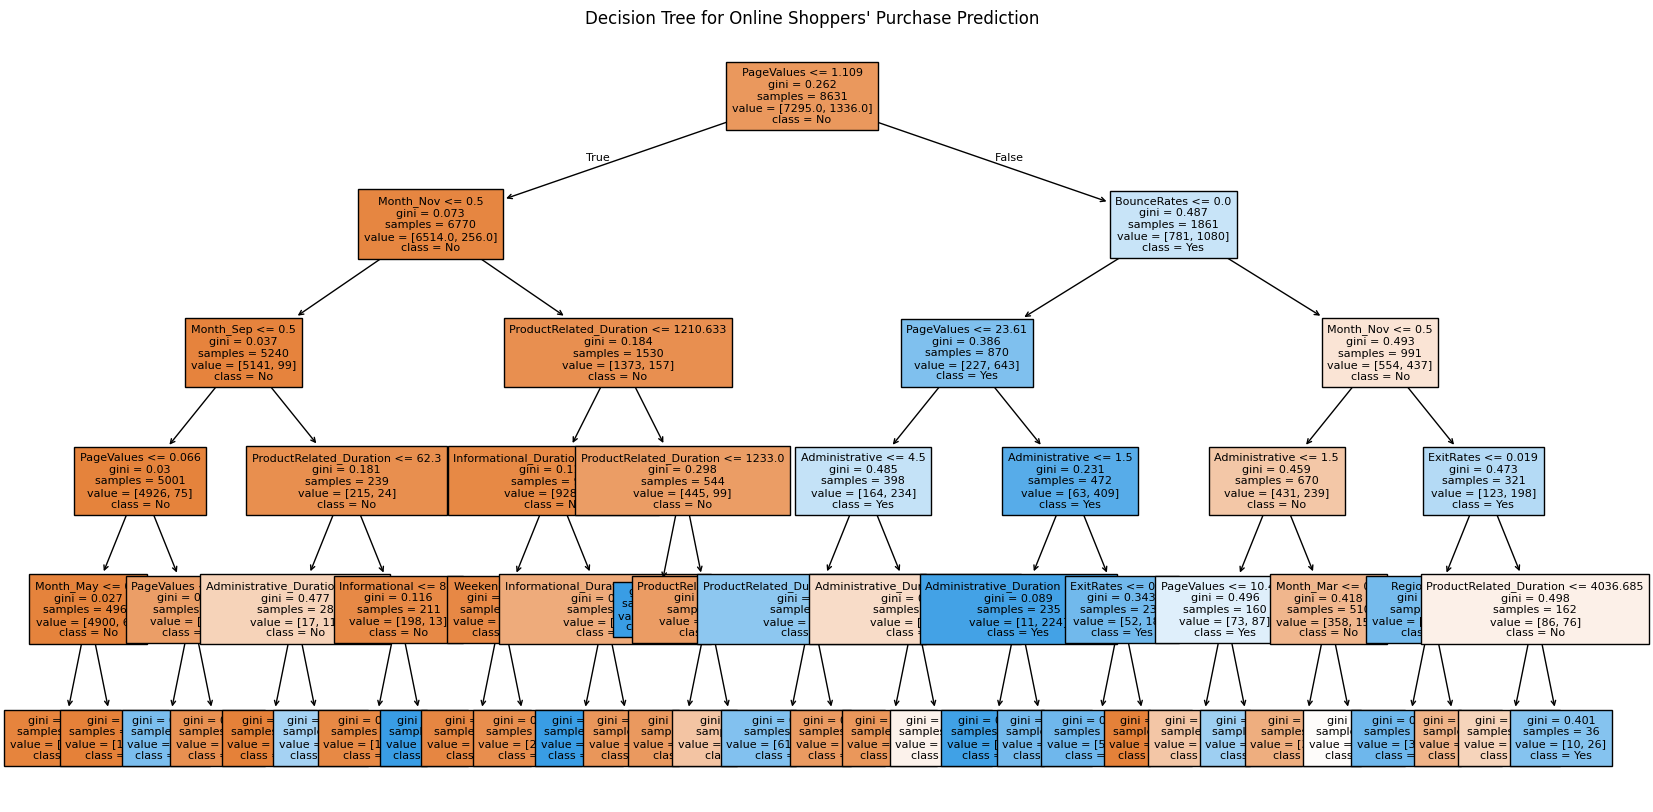

In [9]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, fontsize=8)
plt.title("Decision Tree for Online Shoppers' Purchase Prediction")
plt.show()

In [17]:
# Before uncommenting, please make sure you have graphviz installed if you are not running in Colab.
# If you are in Colab, you might need to install it using: !apt-get install graphviz
# graph.render("decision_tree", format='pdf', cleanup=True)

In [18]:
from google.colab import files
files.download("decision_tree.pdf")

FileNotFoundError: Cannot find file: decision_tree.pdf